In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from scipy.stats import chi2_contingency, mannwhitneyu, norm, t, ttest_ind

%matplotlib inline

In [2]:
cookiescats_df = pd.read_csv("cookie_cats.csv", index_col=0)


In [3]:
# create contingency table 

df_ret = cookiescats_df.groupby('version').agg({'retention_1':'mean','retention_7':'mean','sum_gamerounds':'mean'})
df_ret

,retention_1,retention_7,sum_gamerounds
version,,,
gate_30,0.448188,0.190201,52.456264
gate_40,0.442283,0.182000,51.298776


## Null Hypothesis: players with gate 30 have better retention rate and play more games

In [29]:
# Create samples for each group

sample_1 = []
sample_7 = []
sample_sum = []

for i in range(500):
        mean_1 = cookiescats_df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
        mean_7 = cookiescats_df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
        mean_sum = cookiescats_df.sample(frac=1, replace=True).groupby('version')['sum_gamerounds'].mean()
        sample_1.append(mean_1.iloc[0] - mean_1.iloc[1])
        sample_7.append(mean_7.iloc[0] - mean_7.iloc[1])
        sample_sum.append(mean_sum.iloc[0] - mean_sum.iloc[1])
        
sample_1 = pd.DataFrame(sample_1)
sample_7 = pd.DataFrame(sample_7)
sample_sum = pd.DataFrame(sample_sum)

In [27]:
diff = df_ret.iloc[0] - df_ret.iloc[1]
diff.to_frame()

,0
retention_1,0.005905
retention_7,0.008201
sum_gamerounds,1.157488


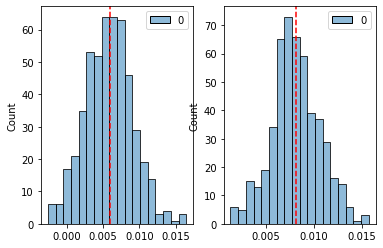

In [35]:
fig,ax = plt.subplots(1,2)
p1=sns.histplot(sample_1,ax=ax[0])
p2=sns.histplot(sample_7,ax=ax[1])
ax[0].axvline(diff[0], color='r', linestyle='--')
ax[1].axvline(diff[1], color='r', linestyle='--')

In [23]:
(sample_1 >= diff[0]).mean()

0    0.532
dtype: float64

In [24]:
(sample_7 >= diff[1]).mean()

0    0.492
dtype: float64

In [36]:
(sample_sum >= diff[2]).mean()

0    0.45
dtype: float64

## Conclusion

As they are greater than 5%, null hypothesis is correct